In [249]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

In [250]:
shanghai = pd.read_excel('shanghai Ranking.xlsx')

In [251]:
shanghai2 = pd.read_excel('shanghai Ranking.xlsx')

In [252]:
shanghai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ranking                 1000 non-null   object 
 1   University Name         1000 non-null   object 
 2   National/Regional Rank  1000 non-null   object 
 3   Total Score             1000 non-null   float64
 4   LOGO                    1000 non-null   object 
 5   University Detail       1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


In [253]:
shanghai.tail(10)

,Ranking,University Name,National/Regional Rank,Total Score,LOGO,University Detail
990,901-1000,University of The Free State,8-9,0.0,http://www.shanghairanking.com/_uni/logo/49df8...,http://www.shanghairanking.com/institution/uni...
991,901-1000,University of Tours,28,0.0,http://www.shanghairanking.com/_uni/logo-jpg/0...,http://www.shanghairanking.com/institution/uni...
992,901-1000,University of Ulster,61-63,0.0,http://www.shanghairanking.com/_uni/logo/df5c5...,http://www.shanghairanking.com/institution/uni...
993,901-1000,University of Urbino,41-46,0.0,http://www.shanghairanking.com/_uni/logo/203c9...,http://www.shanghairanking.com/institution/uni...
994,901-1000,University of Valladolid,35-40,0.0,http://www.shanghairanking.com/_uni/logo/ad34a...,http://www.shanghairanking.com/institution/uni...
995,901-1000,University of Wuppertal,46-47,0.0,http://www.shanghairanking.com/_uni/logo/2ab2f...,http://www.shanghairanking.com/institution/uni...
996,901-1000,Warsaw University of Technology,7-11,0.0,http://www.shanghairanking.com/_uni/logo/a347c...,http://www.shanghairanking.com/institution/war...
997,901-1000,Western Norway University of Applied Sciences,6-7,0.0,http://www.shanghairanking.com/_uni/logo-jpg/d...,http://www.shanghairanking.com/institution/wes...
998,901-1000,Wroclaw University of Science and Technology,7-11,0.0,http://www.shanghairanking.com/_uni/logo/ed480...,http://www.shanghairanking.com/institution/wro...
999,901-1000,Yantai University,148-163,0.0,http://www.shanghairanking.com/_uni/logo/78347...,http://www.shanghairanking.com/institution/yan...


In [254]:
shanghai.columns

Index(['Ranking', 'University Name', 'National/Regional Rank', 'Total Score',
       'LOGO', 'University Detail '],
      dtype='object')

In [255]:
# dropping LOGO column
shanghai.drop(['LOGO'], axis=1, inplace=True)

In [256]:
# dropping University Detail column
shanghai.drop(['University Detail '], axis=1, inplace=True)

In [257]:
# unifying Ranking column values to have integers only
shanghai['Global Ranking'] = shanghai['Ranking'].map(lambda x: x.split('-')[0])
shanghai['Global Ranking'] = shanghai['Global Ranking'].astype(int)

In [258]:
# Dropping old Ranking column
shanghai.drop(['Ranking'], axis=1, inplace=True)

In [259]:
# unifying 'National/Regional Rank' column to have integers only
shanghai['National/Regional Rank_new'] = shanghai['National/Regional Rank'].map(lambda x: x.split('-')[0])
shanghai['National/Regional Rank_new'] = shanghai['National/Regional Rank_new'].astype(int)

In [260]:
# Dropping old 'National/Regional Rank' column
shanghai.drop(['National/Regional Rank'], axis=1, inplace=True)

In [261]:
shanghai.duplicated().sum()

0

In [262]:
shanghai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   University Name             1000 non-null   object 
 1   Total Score                 1000 non-null   float64
 2   Global Ranking              1000 non-null   int32  
 3   National/Regional Rank_new  1000 non-null   int32  
dtypes: float64(1), int32(2), object(1)
memory usage: 23.6+ KB


In [263]:
shanghai.head()

,University Name,Total Score,Global Ranking,National/Regional Rank_new
0,Harvard University,100.0,1,1
1,Stanford University,76.8,2,2
2,Massachusetts Institute of Technology (MIT),70.1,3,3
3,University of Cambridge,69.6,4,1
4,"University of California, Berkeley",65.3,5,4


# ____________________________________________________________________________________________________

# Adding location column to shanghai

In [264]:
world = pd.read_excel('Word Rank University.xlsx')

In [265]:
world.head()

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3


In [266]:
# removing unneeded info in uni names, in a new column
world['University Names_new'] = world['University Names'].map(lambda x: x.split('\n')[0])

In [267]:
# making a dictionary from 'University Names_new' and 'Location' columns
university_loc = dict(zip(world['University Names_new'], world['Location ']))
university_loc

{'Harvard University': 'USA',
 'Massachusetts Institute of Technology': 'USA',
 'Stanford University': 'USA',
 'University of Cambridge': 'United Kingdom',
 'University of Oxford': 'United Kingdom',
 'Princeton University': 'USA',
 'University of Chicago': 'USA',
 'Columbia University': 'USA',
 'University of Pennsylvania': 'USA',
 'Yale University': 'USA',
 'California Institute of Technology': 'USA',
 'University of California, Berkeley': 'USA',
 'University of Tokyo': 'Japan',
 'Cornell University': 'USA',
 'Northwestern University': 'USA',
 'University of Michigan, Ann Arbor': 'USA',
 'Johns Hopkins University': 'USA',
 'University of California, Los Angeles': 'USA',
 'University College London': 'United Kingdom',
 'Duke University': 'USA',
 'PSL University': 'France',
 'University of Illinois at Urbana–Champaign': 'USA',
 'University of Toronto': 'Canada',
 'New York University': 'USA',
 'University of Washington': 'USA',
 'McGill University': 'Canada',
 'Kyoto University': 'Japan

In [268]:
# making a list of unique names from the 'world' dataframe to find them in the shanghai dataframe so we can match locations
set1 = list(set(world['University Names_new']))
set1 = list(map(lambda x : x.strip(), set1))
clean_names = set1
clean_names

['Tampere University',
 'University of Chemistry and Technology, Prague',
 'Taibah University',
 'Pomona College',
 'Hunan University of Science and Technology',
 'National Yang Ming Chiao Tung University',
 'Lappeenranta University of Technology',
 'Maria Sklodowska-Curie National Research Institute of Oncology',
 'Anhui Agricultural University',
 'Ocean University of China',
 'Montana State University - Bozeman',
 'California Polytechnic State University, San Luis Obispo',
 'Nanchang Hangkong University',
 'Murdoch University',
 'Vrije Universiteit Brussel',
 'Tokyo Medical University',
 'Guizhou University',
 'Shaoxing University',
 'University of Koblenz-Landau',
 'University of Fribourg',
 'University of Almería',
 'B.I. Stepanov Institute of Physics of The National Academy of Sciences of Belarus',
 'Tanta University',
 'Jordan University of Science and Technology',
 'Southern University of Science and Technology',
 'Democritus University of Thrace',
 'University of São Paulo',
 '

In [269]:
universities = {
    "University of Michigan-Ann Arbor": "USA",
    "University of Wisconsin - Madison": "USA",
    "University of Minnesota, Twin Cities": "USA",
    "University of Illinois at Urbana-Champaign": "USA",
    "University of Colorado at Boulder": "USA",
    "University of Munich": "Germany",
    "The University of Texas M. D. Anderson Cancer Center": "USA",
    "Université Paris Cité": "France",
    "Technion-Israel Institute of Technology": "Israel",
    "Aix Marseille University": "France",
    "Mayo Clinic Alix School of Medicine": "USA",
    "Moscow State University": "Russia",
    "Rutgers, The State University of New Jersey - New Brunswick": "USA",
    "Swiss Federal Institute of Technology Lausanne": "Switzerland",
    "Université Grenoble Alpes": "France",
    "University of Sao Paulo": "Brazil",
    "Soochow University (China)": "China",
    "Texas A&M University": "USA",
    "University of Goettingen": "Germany",
    "University of Padua": "Italy",
    "University of Tuebingen": "Germany",
    "Vrije Universiteit Amsterdam": "Netherlands",
    "Catholic University of Louvain": "Belgium",
    "China Medical University (Taichung)": "Taiwan",
    "Korea Advanced Institute of Science and Technology": "South Korea",
    "Oregon Health and Science University": "USA",
    "TU Dresden": "Germany",
    "University of Colorado at Denver": "USA",
    "University of Erlangen-Nuremberg": "Germany",
    "University of Kiel": "Germany",
    "University of Leipzig": "Germany",
    "University of Mainz": "Germany",
    "University of Missouri - Columbia": "USA",
    "University of Muenster": "Germany",
    "University of Nebraska - Lincoln": "USA",
    "University of Tennessee - Knoxville": "USA",
    "University of Wuerzburg": "Germany",
    "Virginia Polytechnic Institute and State University": "USA",
    "Ecole Normale Superieure - Lyon": "France",
    "Heinrich Heine University Duesseldorf": "Germany",
    "Linkoping University": "Sweden",
    "Nanjing Tech University": "China",
    "Saint Petersburg State University": "Russia",
    "University of Bochum": "Germany",
    "University of Liege": "Belgium",
    "University of Toulouse 1": "France",
    "University of Ulm": "Germany",
    "China University of Geosciences (Beijing)": "China",
    "China University of Mining and Technology - Xuzhou": "China",
    "China University of Petroleum (Huadong)": "China",
    "CUNY Graduate School and University Center": "USA",
    "King Fahd University of Petroleum & Minerals": "Saudi Arabia",
    "National University of Malaysia": "Malaysia",
    "Technical University Darmstadt": "Germany",
    "UNESP": "Brazil",
    "University of Jena": "Germany",
    "University of Santiago Compostela": "Spain",
    "Asia University": "Taiwan",
    "Brescia University": "USA",
    "China University of Petroleum - Beijing": "China",
    "Duke-NUS Medical School": "Singapore",
    "National University of Ireland, Galway": "Ireland",
    "Northwest University": "China",
    "NOVA University Lisbon": "Portugal",
    "Scuola Normale Superiore - Pisa": "Italy",
    "Umea University": "Sweden",
    "Università Della Svizzera Italiana": "Switzerland",
    "University of Alaska - Fairbanks": "USA",
    "University of Arkansas at Fayetteville": "USA",
    "University of Clermont Auvergne": "France",
    "University of Giessen": "Germany",
    "University of Nevada - Reno": "USA",
    "University of Oklahoma - Norman": "USA",
    "University of Roma - Tor Vergata": "Italy",
    "University of Tromso": "Norway",
    "Brunel University": "United Kingdom",
    "China Medical University (Shenyang)": "China",
    "Eotvos Lorand University": "Hungary",
    "Federal University of Parana": "Brazil",
    "Federal University of Sao Carlos": "Brazil",
    "Federal University of Sao Paulo": "Brazil",
    "HSE University": "Russia",
    "INHA University": "South Korea",
    "National Sun Yat-Sen University": "Taiwan",
    "Orebro University": "Sweden",
    "State University of New York Health Science Center at Brooklyn": "USA",
    "The Open University": "United Kingdom",
    "Ton Duc Thang University": "Vietnam",
    "Universidad Pablo de Olavide": "Spain",
    "Universitat Jaume I": "Spain",
    "University at Albany (State University of New York)": "USA",
    "University of Halle-Wittenberg": "Germany",
    "University of Nantes": "France",
    "University of Oldenburg": "Germany",
    "University of Versailles Saint-Quentin-en-Yvelines": "France",
    "University Rovira i Virgili": "Spain",
    "AUT University": "New Zealand",
    "China University of Mining and Technology - Beijing": "China",
    "Polytechnic University of Catalonia": "Spain",
    "School for Advanced Studies in the Social Sciences": "France",
    "Universitat de Lleida": "Spain",
    "Universiti Teknologi Malaysia": "Malaysia",
    "University of Campania Luigi Vanvitelli": "Italy",
    "University of Engineering and Technology (UET)": "Pakistan",
    "University of Jaen": "Spain",
    "University of Jyvaskyla": "Finland",
    "University of Luebeck": "Germany",
    "University of Malaga": "Spain",
    "University of Nevada-Las Vegas": "USA",
    "University of Quebec Montreal": "Canada",
    "University of Wisconsin-Milwaukee": "USA",
    "University Putra Malaysia": "Malaysia",
    "Dokuz Eylul University": "Turkey",
    "Federal University of Ceara": "Brazil",
    "Gdansk University of Technology": "Poland",
    "Iran University of Science & Technology": "Iran",
    "Mashhad University Medical Science": "Iran",
    "Miguel Hernandez University of Elche": "Spain",
    "Montpellier Business School": "France",
    "Osaka City University": "Japan",
    "Royal College of Surgeons - Ireland": "Ireland",
    "Shandong First Medical University": "China",
    "The University of Tokushima": "Japan",
    "Universidade Federal de Pelotas": "Brazil",
    "University Paris Est Creteil": "France",
    "University of Chieti-Pescara": "Italy",
    "University of Cordoba": "Spain",
    "University of Lahore": "Pakistan",
    "University of Magdeburg": "Germany",
    "University of New England": "Australia",
    "University of Oklahoma - Oklahoma City": "USA",
    "University of Savoy": "France",
    "University of Veterinary Medicine Vienna": "Austria",
    "Adam Mickiewicz University": "Poland",
    "Amity University": "India",
    "Duy Tan University": "Vietnam",
    "Guangdong University of Foreign Studies": "China",
    "Manipal University": "India",
    "Ryerson University": "Canada",
    "SRM Institute of Science and Technology": "India",
    "Universidad Andrés Bello": "Chile",
    "Universidad de Cadiz": "Spain",
    "Universidad de Las Palmas de Gran Canaria": "Spain",
    "Universidade Federal de Mato Grosso do Sul": "Brazil",
    "University of Concepcion": "Chile",
    "University of Klagenfurt": "Austria",
    "University of Los Andes (Colombia)": "Colombia",
    "University of The Free State": "South Africa",
    "University of Ulster": "United Kingdom",
    "Wroclaw University of Science and Technology": "Poland",
    "NanJing Tech University": "China",
    "Auvergne": "France",
    "Vanvitelli": "Italy",
    "SRM INSTITUTE OF SCIENCE AND TECHNOLOGY": "India"
}


In [270]:
# combining both Locations dictionaries into 1
universities.update(university_loc)

In [271]:
# creating a 'Location' column in shanghai dataframe, and filling the values based on the names and locations dictionary we got from the 'world' dataframe
# if names match in each dataframe, then it is the same location
def locfun(university_name):
    for key in universities:
        if key in university_name:
            return universities.get(key)

    return universities.get(university_name)

shanghai['Location'] = shanghai['University Name'].apply(locfun)

In [272]:
shanghai.head()

,University Name,Total Score,Global Ranking,National/Regional Rank_new,Location
0,Harvard University,100.0,1,1,USA
1,Stanford University,76.8,2,2,USA
2,Massachusetts Institute of Technology (MIT),70.1,3,3,USA
3,University of Cambridge,69.6,4,1,United Kingdom
4,"University of California, Berkeley",65.3,5,4,USA


In [273]:
shanghai.isnull().sum()

University Name               0
Total Score                   0
Global Ranking                0
National/Regional Rank_new    0
Location                      0
dtype: int64

In [274]:
shanghai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   University Name             1000 non-null   object 
 1   Total Score                 1000 non-null   float64
 2   Global Ranking              1000 non-null   int32  
 3   National/Regional Rank_new  1000 non-null   int32  
 4   Location                    1000 non-null   object 
dtypes: float64(1), int32(2), object(2)
memory usage: 31.4+ KB


# _____________________________________________

# Visualization

In [275]:
for i in shanghai.columns:
    print(i)

University Name
Total Score
Global Ranking
National/Regional Rank_new
Location


In [276]:
shanghai.head(0)

,University Name,Total Score,Global Ranking,National/Regional Rank_new,Location


In [305]:
scores_more_than_0 = shanghai[shanghai['Total Score'] > 0]

In [309]:
top10 = shanghai[shanghai['Global Ranking'] <= 10]

In [280]:
column_name = 'University Name'

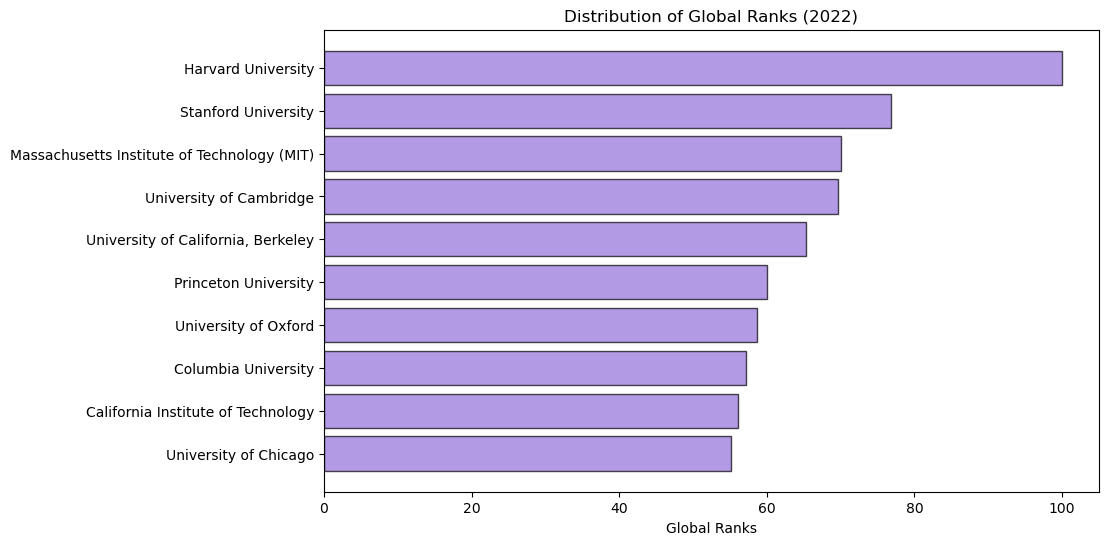

In [328]:


# Plotting Histogram
plt.figure(figsize=(10, 6))
plt.barh(top10['University Name'], top10['Total Score'], edgecolor='black', alpha=0.7, orientation='horizontal', color='mediumpurple')
plt.title('Distribution of Global Ranks (2022)')
plt.xlabel('Global Ranks')
plt.gca().invert_yaxis()
plt.show()
# plt.grid(axis='y', alpha=0.75)



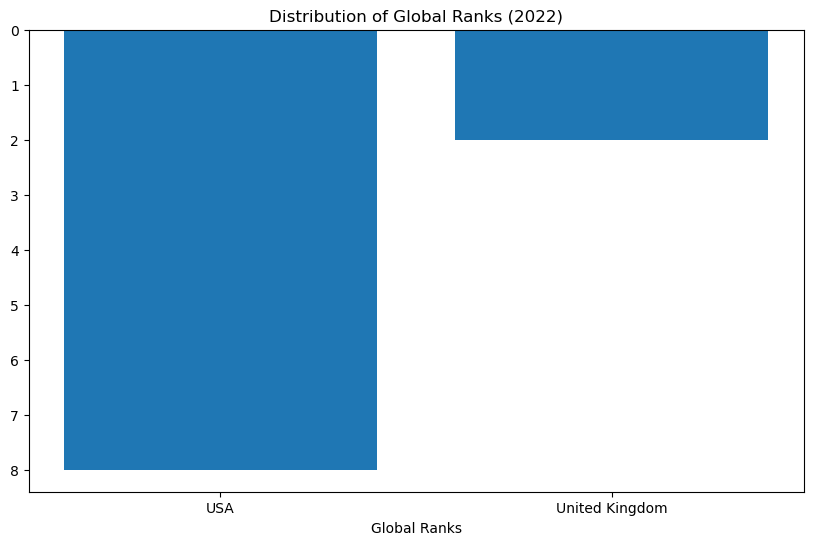

In [404]:
# plt.figure(figsize=(10, 6))
# plt.pie(top10['Location'], top10['National/Regional Rank_new'])
# plt.title('Distribution of Global Ranks (2022)')
# plt.xlabel('Global Ranks')
# plt.gca().invert_yaxis()
# plt.show()

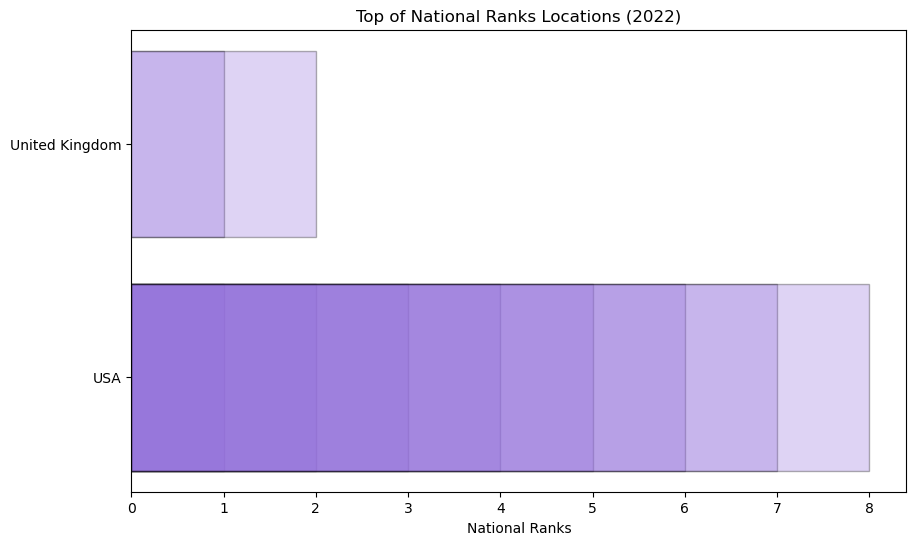

In [416]:
plt.figure(figsize=(10, 6))
plt.barh(top10['Location'], top10['National/Regional Rank_new'], edgecolor='black', alpha=0.3, orientation='horizontal', color='mediumpurple')
plt.title('Top of National Ranks Locations (2022)')
plt.xlabel('National Ranks')
# plt.gca().invert_yaxis()
plt.show()

In [361]:
saudi = shanghai[shanghai['Location'] == 'Saudi Arabia']

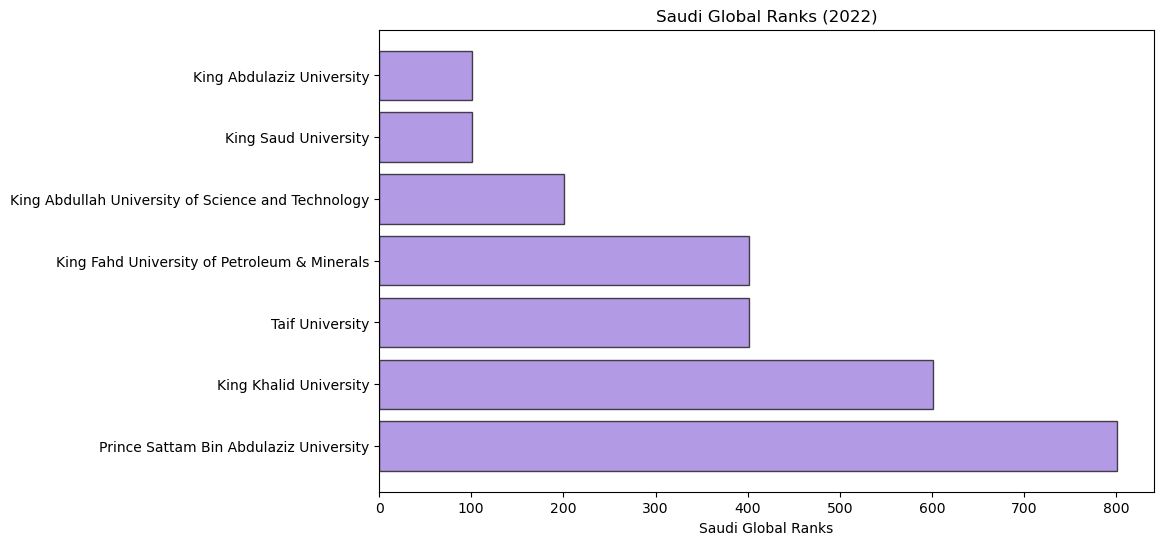

In [371]:
plt.figure(figsize=(10, 6))
plt.barh(saudi['University Name'], saudi['Global Ranking'], edgecolor='black', alpha=0.7, orientation='horizontal', color='mediumpurple')
plt.title('Saudi Global Ranks (2022)')
plt.xlabel('Saudi Global Ranks')
plt.gca().invert_yaxis()
plt.show()

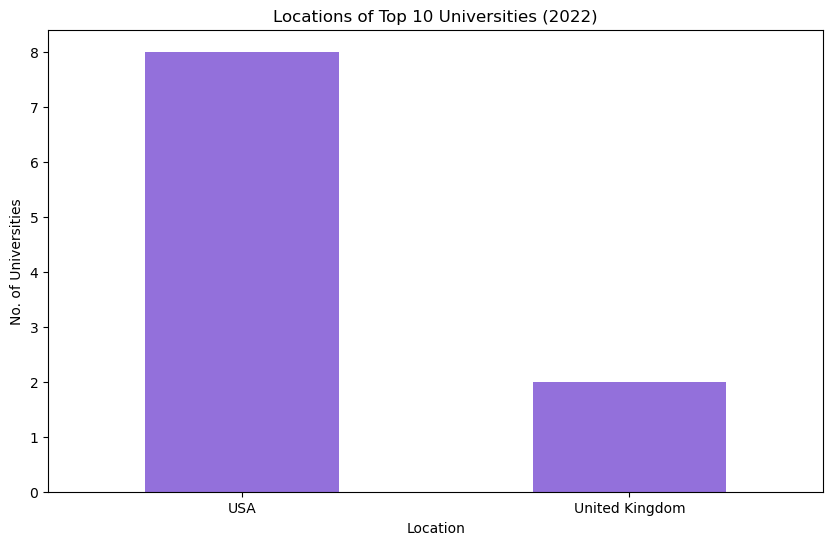

In [351]:
plt.figure(figsize=(10, 6))
top10['Location'].value_counts().plot(kind='bar', color='mediumpurple')
plt.title('Locations of Top 10 Universities (2022)')
plt.xlabel('Location')
plt.ylabel('No. of Universities')
# plt.xticks(np.arange(1, 101, step=10))
plt.xticks(rotation=0)

# plt.grid(axis='y', alpha=0.75)
plt.show()

In [286]:
shanghai['Location'].value_counts().sum()

1000

In [344]:
scores_more_than_0 = shanghai[shanghai['Total Score'] > 0]

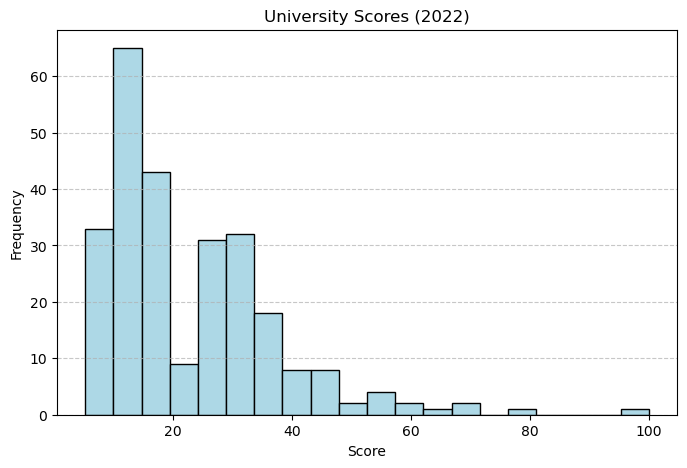

In [358]:
column_name = 'Total Score'
title = 'University Scores'

plt.figure(figsize=(8, 5))
plt.hist(scores_more_than_0['Total Score'], bins=20, color='lightblue', edgecolor='black')
plt.title('University Scores (2022)')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [293]:
location_count = shanghai['Location'].head(50).value_counts()

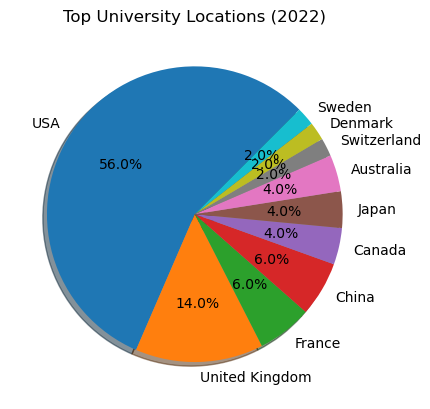

In [360]:
plt.pie(x=location_count.values,
        labels=location_count.index,
        startangle=45,
        shadow=True,
        autopct='%1.1f%%'
        # explode = [0.3,0.2]
       )
plt.title('Top University Locations (2022)')
plt.show()

<Axes: >

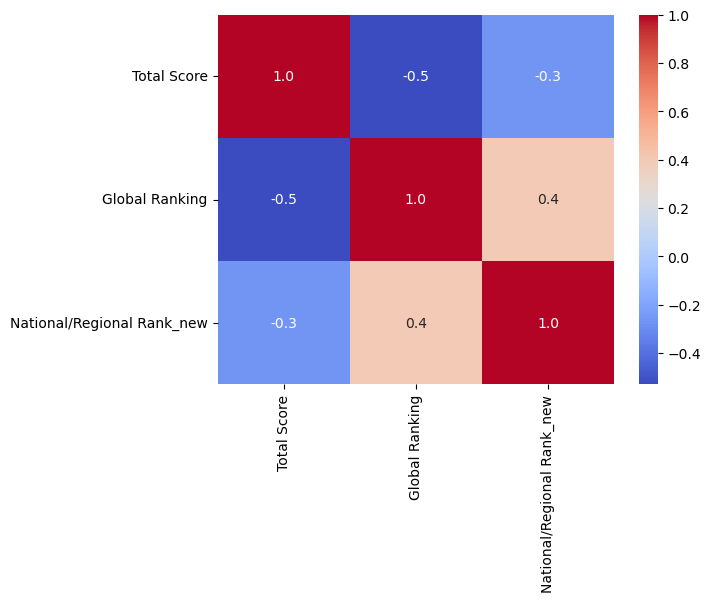

In [345]:
from scipy.stats import pearsonr

q4 = scores_more_than_0.drop(['University Name', 'Location'], axis=1)

corr_matrix = q4.corr(method='pearson')

sns.heatmap(corr_matrix,
            annot=True, 
            cmap='coolwarm',
            fmt=".1f"
           )